   Nitrogen  Phosphorus  Potassium    pH  Organic_Carbon  Moisture Soil_Type
0        71          40        150  6.31            1.31     12.72     Loamy
1        34          49         90  7.36            1.64     19.64      Clay
2        80          24        194  8.10            2.11     12.13      Clay
3        40           5        190  7.00            1.58     34.42      Clay
4        43          12         95  6.66            1.82     11.10     Loamy

-- Metrics --
Accuracy: 0.2833333333333333
Precision: 0.2794524189261031
Recall: 0.2833333333333333
F1 Score: 0.25855263157894737


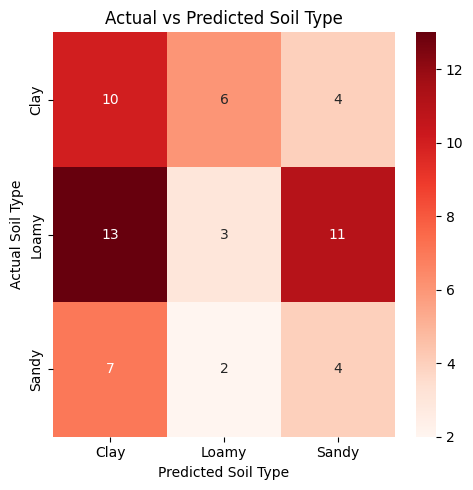

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, confusion_matrix
import seaborn as sns

# Load dataset
we = pd.read_csv("soil_prediction_dataset.csv")
print(we.head())

# Select numeric features
feature_cols = ["Nitrogen","Phosphorus","Potassium","pH","Organic_Carbon","Moisture"]
x = we[feature_cols].copy()

# Replace zeros with NaN
x = x.replace(0, np.nan)

# Fill NaN with median
x = x.fillna(x.median())

# Outlier removal (IQR)
Q1 = x.quantile(0.25)
Q3 = x.quantile(0.75)
IQR = Q3 - Q1

mask = ~((x < (Q1 - 1.5 * IQR)) | (x > (Q3 + 1.5 * IQR))).any(axis=1)

# Apply mask
x_clean = x[mask]
y_clean = we["Soil_Type"][mask]

# Label encode soil type
le = LabelEncoder()
y = le.fit_transform(y_clean)

# Split clean data
x_train, x_test, y_train, y_test = train_test_split(
    x_clean, y, test_size=0.2, random_state=40
)

# Scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Model
model = LogisticRegression(max_iter=500)
model.fit(x_train_scaled, y_train)
y_pred = model.predict(x_test_scaled)

# Metrics
print("\n-- Metrics --")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average="weighted"))
print("Recall:", recall_score(y_test, y_pred, average="weighted"))
print("F1 Score:", f1_score(y_test, y_pred, average="weighted"))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds",
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted Soil Type")
plt.ylabel("Actual Soil Type")
plt.title("Actual vs Predicted Soil Type")
plt.tight_layout()
plt.show()
